# Data Cleaning

## Loading Data

In [98]:
import pandas as pd

data = pd.read_csv('../data/raw/abalone-1.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Descriptive Stats

In [99]:
print("Data Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [100]:

print("\n\nDescriptive Statistics:")
data.describe(include='all')



Descriptive Statistics:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [101]:
# Checking For Duplicates
print('Duplicated Rows: ', data.duplicated().sum())

Duplicated Rows:  0


In [102]:
# Checking for null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Array of continuous variables
continuous_vars = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 2
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


In [104]:
#Removing rows with 0 or negative values in continuous variables
data = data[(data[continuous_vars] > 0).all(axis=1)]

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())
    

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 0
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


In [105]:
# # Checking for outliers using boxplot
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# # Flatten axes array for easy iteration
# axes = axes.flatten()

# # Create one boxplot per variable
# for i, var in enumerate(continuous_vars):
#     sns.boxplot(x=data[var], ax=axes[i])
#     axes[i].set_title(f"Boxplot of {var}")
#     axes[i].set_xlabel(var)

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [106]:
cleaned_data = data.copy()

In [107]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)

### 1a. Comment 
#### Data Overview
- The dataset contains 4173 entries with 10 columns.
- After cleaning, the dataset was reduced to 4168 entries.
- The columns include measurements of abalone and their respective ages.

#### Data Cleaning
- No null values were present in the dataset.
- Duplicate rows were not found.
- Rows with 0 or negative values in continuous variables were removed.

In [108]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)

# Data Exploration

In [109]:
data = pd.read_csv('../data/processed/abalone.csv')

Text(0, 0.5, 'Frequency')

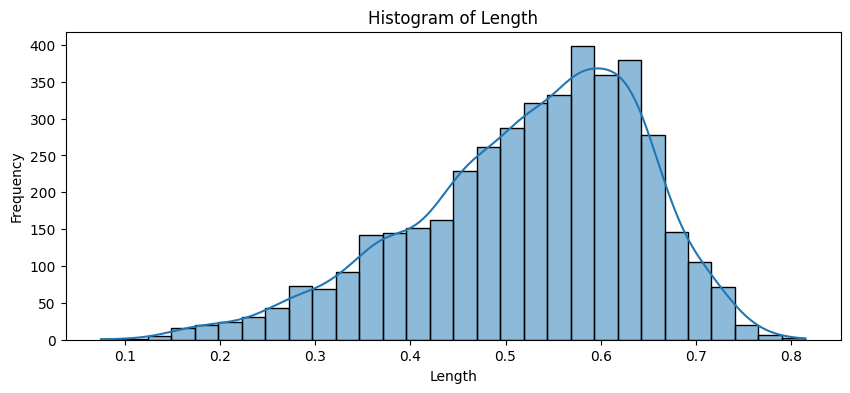

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Histogram
sns.histplot(data['Length'], bins=30, kde=True)
plt.title("Histogram of Length")
plt.xlabel("Length")
plt.ylabel("Frequency")


In [111]:
# Getting lenght statistics
data['Length'].describe()

count    4175.000000
mean        0.524065
std         0.120069
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [112]:
data['Length'].median()

np.float64(0.545)



### 1b. Comment
#### Distribution of Length

- **Centre**:  
  The mean and median of Length are close, **0.52 and 0.55**, suggesting a fairly symmetric central tendency.

- **Dispersion**:  
  Values range from approximately **0.1 to 0.8**, showing a moderate spread. Most observations lie between **0.4 and 0.7**.

- **Shape**:  
  The histogram shows a **slight left skew**, meaning there are more values concentrated on the higher end, with a longer tail toward the lower end.

- **Outliers**:  
  The histogram suggests, there may be **lower-end outliers** above 0.15, but they are not extreme or frequent.




## Exploring Multicollinearity

<Axes: >

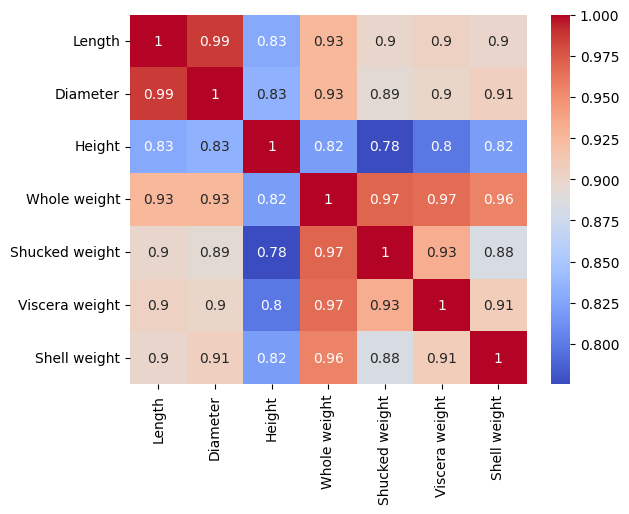

In [113]:
#Predictors for the model are all the columns except the response variable 'Rings'
predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

#Correlation matrix of predictors
corr_matrix = data[predictors].corr() 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### 1c. Evidence of Multicollinearity

#### Observations from the Correlation Heatmap:
- There is extremely high correlation between `Length` and `Diameter` (0.99), meaning they are almost interchangeable.
- Similarly, `Length` also has high correlations (>= 0.9) with `Height`, and Weight measures
- The weight variables also strongly correlate with each other (> 0.90).
- Overall: All the continuos variables have correlations exceeding 0.84, which is still a high number


